# **PRÁCTICA 2: AUTOENCODERS - Parte 1: Densos**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicio 1 Incrementa el número de capas y compara los resultados**

In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [5]:
input_img = Input(shape=(784,))

In [6]:
encoding_dim = 32  
from keras.models import Model
from keras.layers import Input, Dense
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [7]:
autoencoder.compile(optimizer='adam', loss='MSE', metrics = ['accuracy'])

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
import numpy as np
import matplotlib.pyplot as plt
image_index = np.random.randint(len((x_train)))
image = x_train[image_index]
#plt.imshow(image.reshape((28, 28)), cmap='gray')

In [12]:
# DATOS
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
history2 = autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
469/469 [==============================] - 5s 5ms/step - loss: 0.0487 - accuracy: 0.0094 - val_loss: 0.0278 - val_accuracy: 0.0141
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0238 - accuracy: 0.0128 - val_loss: 0.0203 - val_accuracy: 0.0092
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.0119 - val_loss: 0.0172 - val_accuracy: 0.0115
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0166 - accuracy: 0.0104 - val_loss: 0.0152 - val_accuracy: 0.0122
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0149 - accuracy: 0.0108 - val_loss: 0.0138 - val_accuracy: 0.0106
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.0104 - val_loss: 0.0128 - val_accuracy: 0.0102
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0129 - accuracy: 0.0109 - val_loss: 0.0122 - val_accuracy: 0.0128
Epoch 

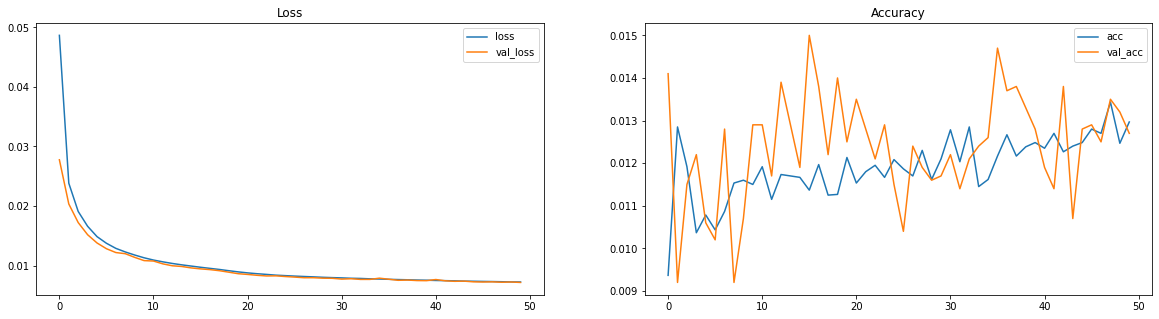

In [14]:
# Ploteamos la evolucion del loss durante el entrenamiento
import matplotlib.pyplot as plt

%matplotlib inline

figure, axis = plt.subplots(1,2, figsize = (20,5))
axis[0].plot(history2.history['loss'],label="loss")
axis[0].set_title('Loss')
axis[0].plot(history2.history['val_loss'],label="val_loss")
axis[0].legend()

axis[1].plot(history2.history['accuracy'],label="acc")
axis[1].set_title('Accuracy')
axis[1].plot(history2.history['val_accuracy'],label="val_acc")
axis[1].legend()

plt.show()

In [15]:
test_scores = autoencoder.evaluate(x_test, x_test, verbose=2)

313/313 - 1s - loss: 0.0072 - accuracy: 0.0127 - 674ms/epoch - 2ms/step


In [16]:
# APLICACION EN TEST
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


Test data as input:


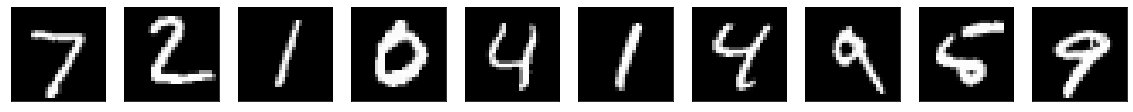

Decoded Image:


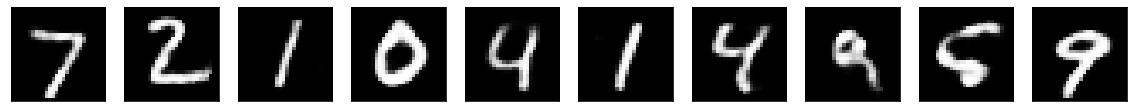

In [17]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
print("Test data as input:")
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Decoded Image:")
for i in range(n):

    # display reconstruccion
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Comparación

En este caso vemos que la construcción de las imágenes no varia en gran cantidad. Lo que si podemos observar es la evolucion del loss y el accuracy durante el entrenamiento. 

Como podemos observar, en la situación donde teníamos menos capas el loss decrece de manera constante, mientras que en este caso hay algunos movimientos leves en la curva.

Además, en el caso del accuracy, en el laboratiorio tanto el acc como el val_acc se mueven al unísono. Al contrario que en el ejercicio 1 que podemos encontrar zonas con picos, haciendo que el accuracy baje.